## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('C:/Users/Shashank Deep/Desktop/Deeplearning/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

2600

In [4]:
paths[:5]

['C:/Users/Shashank Deep/Desktop/Deeplearning/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:/Users/Shashank Deep/Desktop/Deeplearning/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:/Users/Shashank Deep/Desktop/Deeplearning/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:/Users/Shashank Deep/Desktop/Deeplearning/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:/Users/Shashank Deep/Desktop/Deeplearning/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

speech  label
0  C:/Users/Shashank Deep/Desktop/Deeplearning/TE...  angry
1  C:/Users/Shashank Deep/Desktop/Deeplearning/TE...  angry
2  C:/Users/Shashank Deep/Desktop/Deeplearning/TE...  angry
3  C:/Users/Shashank Deep/Desktop/Deeplearning/TE...  angry
4  C:/Users/Shashank Deep/Desktop/Deeplearning/TE...  angry

In [7]:
df['label'].value_counts()

angry      400
fear       400
happy      400
neutral    400
ps         400
sad        400
disgust    200
Name: label, dtype: int64

## Exploratory Data Analysis

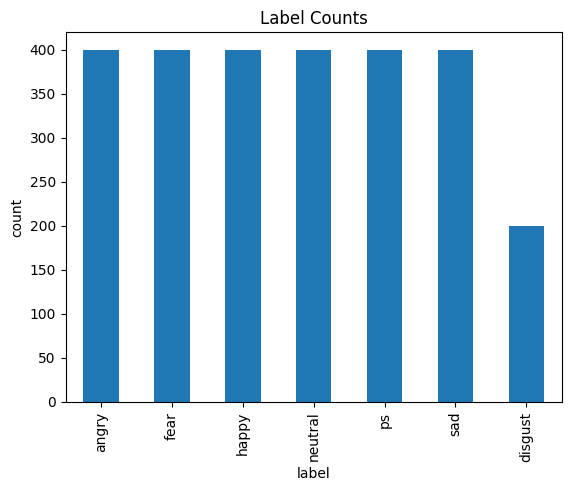

In [8]:
#sns.countplot(df['label'])
import matplotlib.pyplot as plt

# assume 'data' is a Pandas DataFrame with a column called 'label'
fig, ax = plt.subplots()
df['label'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('label')
ax.set_ylabel('count')
ax.set_title('Label Counts')
plt.show()

In [9]:
# def waveplot(data, sr, emotion):
#     plt.figure(figsize=(10,4))
#     plt.title(emotion, size=20)
#     librosa.display.waveplot(data, sr=sr)
#     plt.show()

import librosa.display

def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

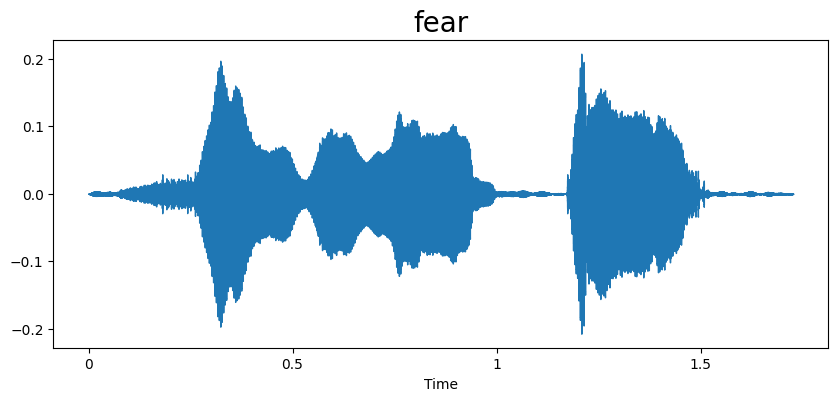

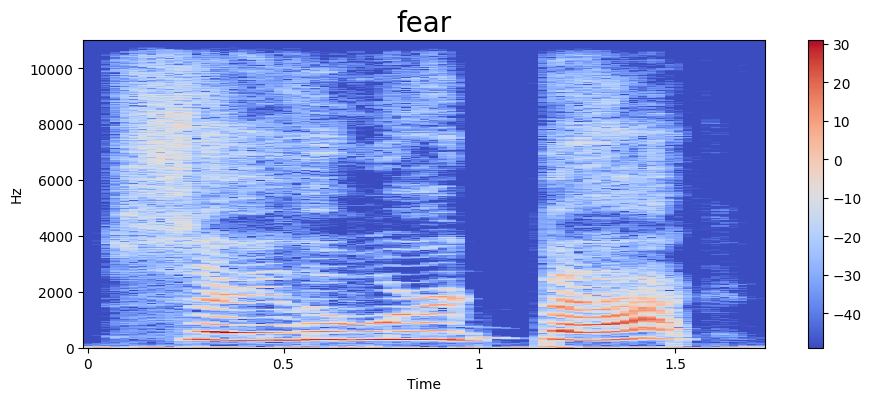

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [11]:
# emotion = 'disgust'
# path = np.array(df['speech'][df['label']==emotion])[0]
# data, sampling_rate = librosa.load(path)
# waveshow(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

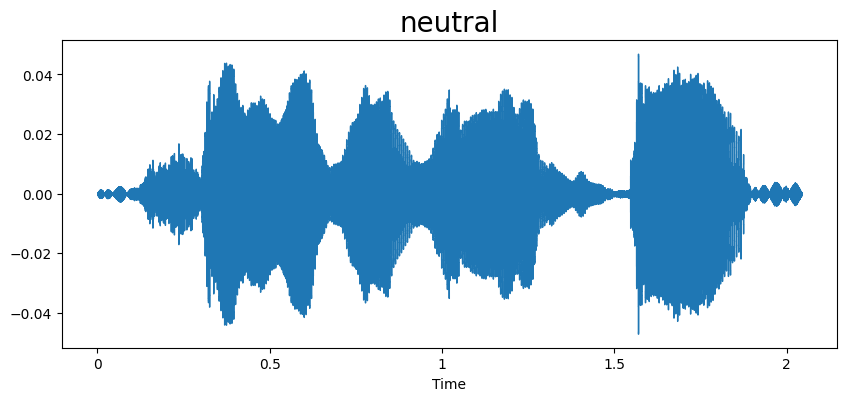

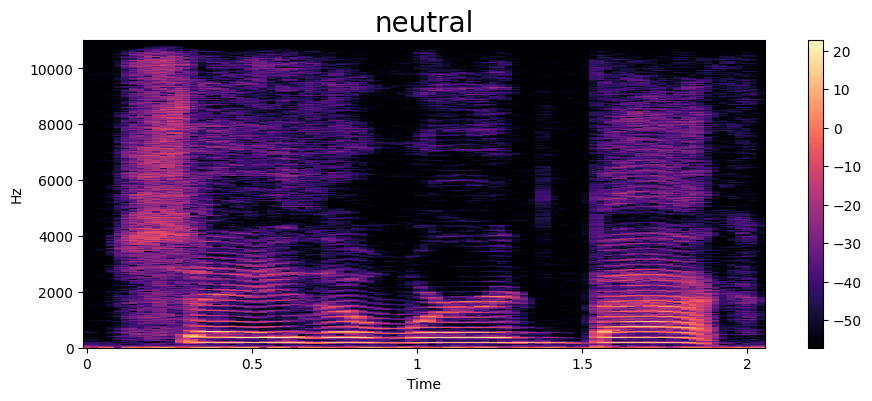

In [12]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

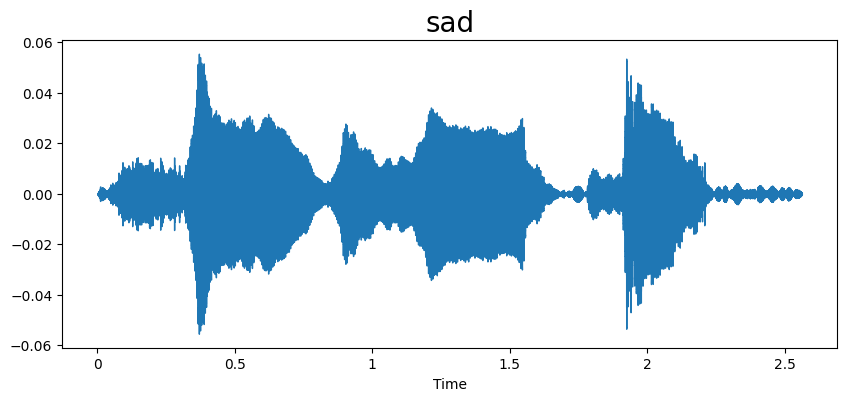

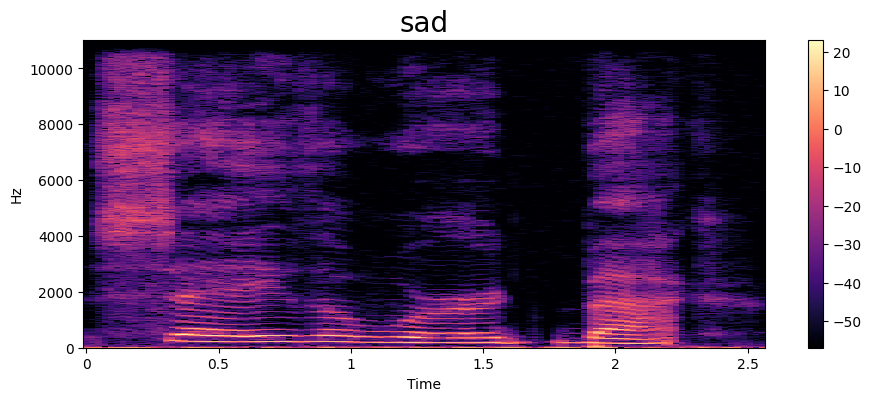

In [13]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

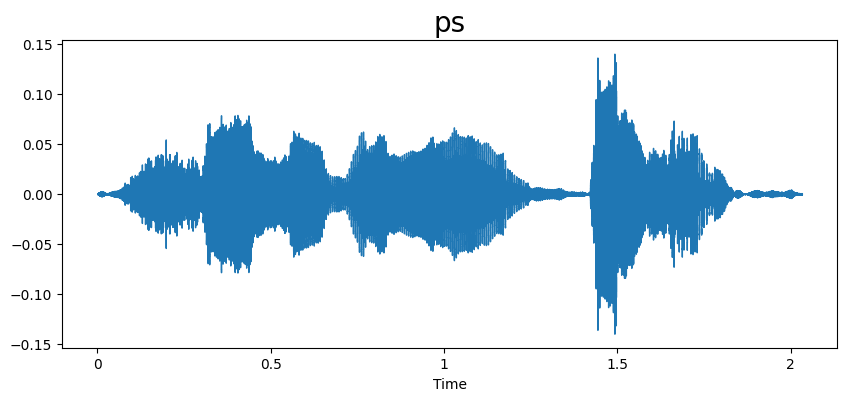

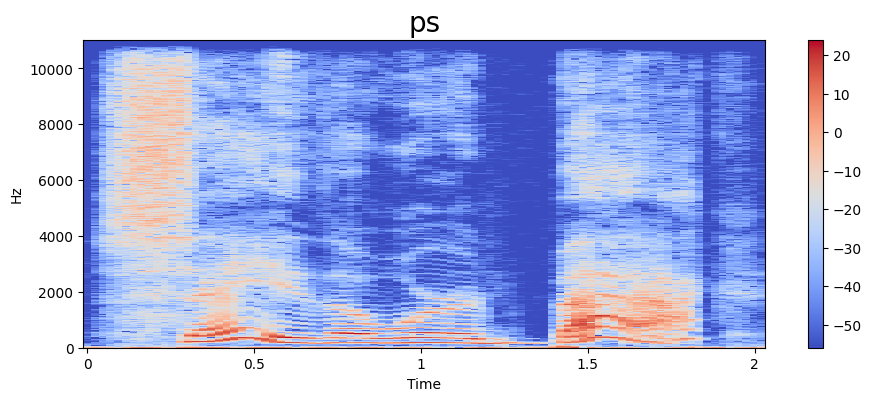

In [14]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

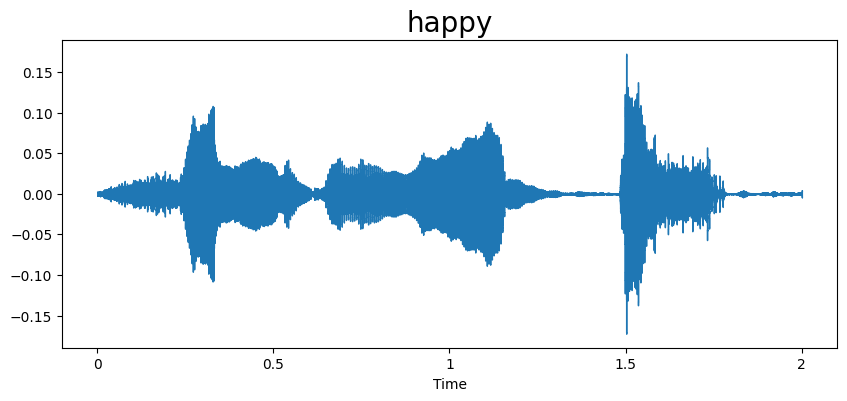

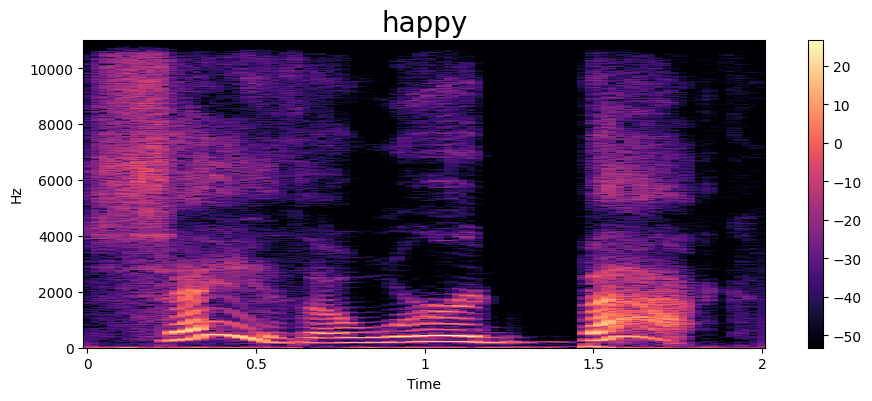

In [15]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [16]:
# def extract_mfcc(filename):
#     y, sr = librosa.load(filename, duration=3, offset=0.5)
#     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
#     return mfcc

# def extract_mfcc(filename, sr=22050, n_mfcc=13, n_fft=2048, hop_length=512):
#     #if isinstance(filename, str):
#         # if input is a file path
#         y, sr = librosa.load(filename, duration=3, offset=0.5)
#     #else:
#         # if input is a numpy array
#         #y = wav
#         mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
#         return mfcc.flatten()

def extract_mfcc(filename):
    y, sr = librosa.load(filename, sr=None, mono=True, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [17]:
extract_mfcc(df['speech'][0])

array([-4.0703143e+02,  7.9287247e+01, -1.5191811e+01, -1.9691547e+01,
       -4.3676019e+00,  1.2073053e+01, -1.6534670e+01, -1.0039978e+01,
       -5.5086055e+00, -3.7382519e+00, -1.7964184e-01, -1.9969600e+00,
        1.4452455e+00,  4.3501389e-01,  1.8717887e+00,  3.1552839e+00,
       -1.4446428e+00, -5.8326006e+00, -3.0984159e+00, -3.8049078e+00,
       -1.2673911e+01, -1.4731995e+00, -6.4099727e+00, -8.1103951e-01,
        8.6038008e+00,  1.1136461e+01,  2.1523832e+01,  1.8892187e+01,
        1.8800392e+01,  1.2967604e+01,  6.7127638e+00,  1.3936824e+00,
        4.8728313e+00,  1.0510412e+01,  4.0546293e+00,  3.9816480e+00,
       -2.3917837e+00,  5.1022196e+00,  7.9049931e+00,  4.2863646e+00],
      dtype=float32)

In [18]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [19]:
X_mfcc

0       [-407.03143, 79.28725, -15.191811, -19.691547,...
1       [-472.29318, 100.8755, 4.7668447, -29.103617, ...
2       [-434.87958, 47.675488, 1.3100156, 2.0521934, ...
3       [-409.13513, 76.7054, -6.6919794, -23.19103, -...
4       [-438.43646, 78.02053, 10.828708, 17.760412, 6...
                              ...                        
2595    [-408.96432, 82.19867, 31.267515, 47.734333, 1...
2596    [-432.4239, 105.32336, 25.398108, 43.35587, 9....
2597    [-380.69565, 81.7038, 34.13676, 41.77921, -1.3...
2598    [-440.49353, 91.281296, 27.409538, 40.397945, ...
2599    [-425.8781, 71.196205, 31.19142, 45.877674, 8....
Name: speech, Length: 2600, dtype: object

In [20]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2600, 40)

In [21]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2600, 40, 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [23]:
y = y.toarray()

In [24]:
y.shape

(2600, 7)



## Create the LSTM Model

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [26]:
# Train the model
import tensorflow as tf

X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
history = model.fit(X_tensor, y, validation_split=0.2, epochs=50, batch_size=64)

# history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
33/33 [==============================] - 6s 99ms/step - loss: 1.1403 - accuracy: 0.5591 - val_loss: 1.6185 - val_accuracy: 0.5058
Epoch 2/50
33/33 [==============================] - 3s 82ms/step - loss: 0.3928 - accuracy: 0.8687 - val_loss: 1.6620 - val_accuracy: 0.6308
Epoch 3/50
33/33 [==============================] - 3s 81ms/step - loss: 0.2146 - accuracy: 0.9385 - val_loss: 1.2983 - val_accuracy: 0.7000
Epoch 4/50
33/33 [==============================] - 3s 86ms/step - loss: 0.1137 - accuracy: 0.9663 - val_loss: 1.7240 - val_accuracy: 0.6212
Epoch 5/50
33/33 [==============================] - 3s 81ms/step - loss: 0.0980 - accuracy: 0.9731 - val_loss: 1.4211 - val_accuracy: 0.6654
Epoch 6/50
33/33 [==============================] - 3s 79ms/step - loss: 0.0823 - accuracy: 0.9769 - val_loss: 1.7129 - val_accuracy: 0.5808
Epoch 7/50
33/33 [==============================] - 3s 80ms/step - loss: 0.0697 - accuracy: 0.9769 - val_loss: 2.0240 - val_accuracy: 0.6404
Epoch 8/50
33

In [27]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

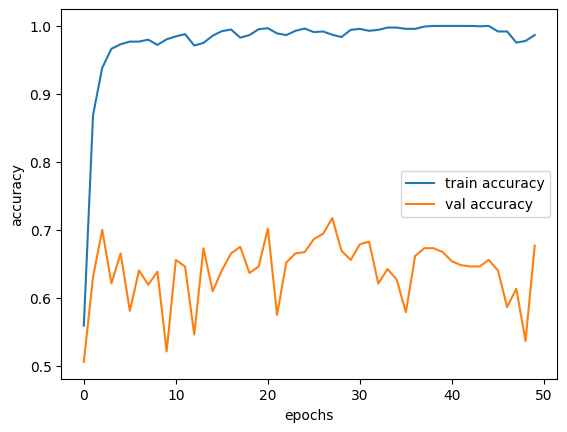

In [28]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

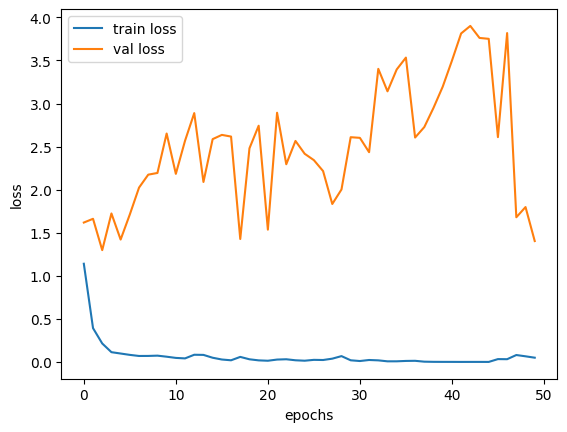

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
def predict_emotion(path_to_wav_file):
    # Load the WAV file and extract MFCC features
    y, sr = librosa.load(path_to_wav_file, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    X = np.expand_dims(mfcc, axis=0)
    X = np.expand_dims(X, axis=2)

    # Make a prediction using the trained LSTM model
    predicted_vector = model.predict(X)
    predicted_label = np.argmax(predicted_vector)

    # Convert the predicted label from a number to an emotion string
    emotions = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    predicted_emotion = emotions[predicted_label]

    return predicted_emotion


In [31]:
predict_emotion('C:/Users/Shashank Deep/Desktop/Deeplearning/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav')

1/1 [==============================] - 1s 534ms/step


'happy'

In [32]:
predict_emotion('C:/Users/Shashank Deep/Desktop/Deeplearning/TESS Toronto emotional speech set data/YAF_sad/YAF_beg_sad.wav')

1/1 [==============================] - 0s 31ms/step


IndexError: list index out of range

In [33]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

# Save the model
model.save("my_model.h5")


Epoch 1/50
33/33 [==============================] - 3s 103ms/step - loss: 0.0136 - accuracy: 0.9962 - val_loss: 2.0920 - val_accuracy: 0.6519
Epoch 2/50
33/33 [==============================] - 3s 99ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 2.4995 - val_accuracy: 0.6635
Epoch 3/50
33/33 [==============================] - 3s 99ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.6463 - val_accuracy: 0.6712
Epoch 4/50
33/33 [==============================] - 3s 102ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.8179 - val_accuracy: 0.6750
Epoch 5/50
33/33 [==============================] - 3s 87ms/step - loss: 0.0035 - accuracy: 0.9986 - val_loss: 2.6144 - val_accuracy: 0.6865
Epoch 6/50
33/33 [==============================] - 2s 75ms/step - loss: 0.0060 - accuracy: 0.9976 - val_loss: 3.2477 - val_accuracy: 0.6519
Epoch 7/50
33/33 [==============================] - 2s 75ms/step - loss: 0.0164 - accuracy: 0.9957 - val_loss: 2.2402 - val_accuracy: 0.6750
Epoch 8/50
